In [1]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import random
import numpy as np
import sys; sys.path.append('../')
from misc import h5file
import yaml
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from BorutaShap import BorutaShap

In [2]:
noise_lv = 30
fp1 = "./IPI_output_files/PMS_data.h5"
fp2 = "./IPI_output_files/encoded_pde_names.yaml"
X_pre, best_subsets, un, y_pre = h5file(file_path=fp1, mode='r', return_dict=False)

with open(fp2, 'r') as f:
    config = yaml.load(f, yaml.Loader)
f.close()
encoded_feature_names = config["encoded_feature_names"]
encoded_pde_names = config["encoded_pde_names"]
encoded_pde_names

['X_pre', 'best_subsets', 'un', 'y_pre']


['u*u_1',
 'u_11+u*u_1',
 'u_1+u_11+u*u_1',
 'u_1+u_11+u*u_1+u*u*u_11',
 'u+u*u+u_1+u_11+u*u_1',
 'u+u*u+u_1+u_11+u*u_1+u*u*u_11',
 'u+u*u+u_1+u_11+u*u_1+u*u_11+u*u*u_11',
 'u+u*u+u_1+u_11+u*u_1+u*u*u_1+u*u_11+u*u*u_11']

In [3]:
hie = [np.where(best_subsets[i]>0)[0].tolist() for i in range(best_subsets.shape[-1])]

In [4]:
import xgboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import shap

Learning rate set to 0.058909
0:	learn: 0.0199706	total: 54.5ms	remaining: 54.5s
1:	learn: 0.0192464	total: 55.6ms	remaining: 27.7s
2:	learn: 0.0185741	total: 56.3ms	remaining: 18.7s
3:	learn: 0.0179271	total: 56.9ms	remaining: 14.2s
4:	learn: 0.0173142	total: 57.6ms	remaining: 11.5s
5:	learn: 0.0167536	total: 58.2ms	remaining: 9.63s
6:	learn: 0.0161935	total: 58.8ms	remaining: 8.34s
7:	learn: 0.0157186	total: 59.3ms	remaining: 7.36s
8:	learn: 0.0152905	total: 60ms	remaining: 6.6s
9:	learn: 0.0148302	total: 61ms	remaining: 6.04s
10:	learn: 0.0144030	total: 61.7ms	remaining: 5.54s
11:	learn: 0.0139846	total: 62.4ms	remaining: 5.14s
12:	learn: 0.0136004	total: 63ms	remaining: 4.78s
13:	learn: 0.0132516	total: 63.6ms	remaining: 4.48s
14:	learn: 0.0128972	total: 64.2ms	remaining: 4.21s
15:	learn: 0.0125505	total: 64.8ms	remaining: 3.99s
16:	learn: 0.0122201	total: 65.5ms	remaining: 3.79s
17:	learn: 0.0119241	total: 66.1ms	remaining: 3.6s
18:	learn: 0.0116177	total: 66.6ms	remaining: 3.44s


207:	learn: 0.0050077	total: 185ms	remaining: 705ms
208:	learn: 0.0050071	total: 186ms	remaining: 703ms
209:	learn: 0.0050059	total: 186ms	remaining: 701ms
210:	learn: 0.0050039	total: 187ms	remaining: 699ms
211:	learn: 0.0050021	total: 188ms	remaining: 697ms
212:	learn: 0.0050013	total: 188ms	remaining: 696ms
213:	learn: 0.0049998	total: 189ms	remaining: 694ms
214:	learn: 0.0049991	total: 189ms	remaining: 692ms
215:	learn: 0.0049986	total: 190ms	remaining: 690ms
216:	learn: 0.0049973	total: 191ms	remaining: 688ms
217:	learn: 0.0049953	total: 191ms	remaining: 686ms
218:	learn: 0.0049937	total: 192ms	remaining: 684ms
219:	learn: 0.0049929	total: 192ms	remaining: 682ms
220:	learn: 0.0049922	total: 193ms	remaining: 680ms
221:	learn: 0.0049909	total: 193ms	remaining: 677ms
222:	learn: 0.0049897	total: 194ms	remaining: 676ms
223:	learn: 0.0049886	total: 194ms	remaining: 673ms
224:	learn: 0.0049881	total: 195ms	remaining: 672ms
225:	learn: 0.0049865	total: 196ms	remaining: 670ms
226:	learn: 

520:	learn: 0.0047775	total: 372ms	remaining: 342ms
521:	learn: 0.0047771	total: 372ms	remaining: 341ms
522:	learn: 0.0047763	total: 373ms	remaining: 340ms
523:	learn: 0.0047759	total: 374ms	remaining: 339ms
524:	learn: 0.0047756	total: 374ms	remaining: 339ms
525:	learn: 0.0047752	total: 375ms	remaining: 338ms
526:	learn: 0.0047747	total: 375ms	remaining: 337ms
527:	learn: 0.0047743	total: 376ms	remaining: 336ms
528:	learn: 0.0047736	total: 377ms	remaining: 335ms
529:	learn: 0.0047733	total: 377ms	remaining: 335ms
530:	learn: 0.0047731	total: 378ms	remaining: 334ms
531:	learn: 0.0047728	total: 378ms	remaining: 333ms
532:	learn: 0.0047726	total: 379ms	remaining: 332ms
533:	learn: 0.0047717	total: 379ms	remaining: 331ms
534:	learn: 0.0047712	total: 380ms	remaining: 330ms
535:	learn: 0.0047708	total: 381ms	remaining: 329ms
536:	learn: 0.0047703	total: 381ms	remaining: 329ms
537:	learn: 0.0047699	total: 382ms	remaining: 328ms
538:	learn: 0.0047694	total: 382ms	remaining: 327ms
539:	learn: 

826:	learn: 0.0046536	total: 557ms	remaining: 117ms
827:	learn: 0.0046534	total: 558ms	remaining: 116ms
828:	learn: 0.0046531	total: 559ms	remaining: 115ms
829:	learn: 0.0046528	total: 559ms	remaining: 115ms
830:	learn: 0.0046527	total: 560ms	remaining: 114ms
831:	learn: 0.0046526	total: 561ms	remaining: 113ms
832:	learn: 0.0046521	total: 561ms	remaining: 113ms
833:	learn: 0.0046515	total: 562ms	remaining: 112ms
834:	learn: 0.0046513	total: 563ms	remaining: 111ms
835:	learn: 0.0046509	total: 563ms	remaining: 111ms
836:	learn: 0.0046507	total: 564ms	remaining: 110ms
837:	learn: 0.0046505	total: 565ms	remaining: 109ms
838:	learn: 0.0046502	total: 565ms	remaining: 108ms
839:	learn: 0.0046499	total: 566ms	remaining: 108ms
840:	learn: 0.0046496	total: 566ms	remaining: 107ms
841:	learn: 0.0046491	total: 567ms	remaining: 106ms
842:	learn: 0.0046485	total: 568ms	remaining: 106ms
843:	learn: 0.0046484	total: 569ms	remaining: 105ms
844:	learn: 0.0046479	total: 569ms	remaining: 104ms
845:	learn: 

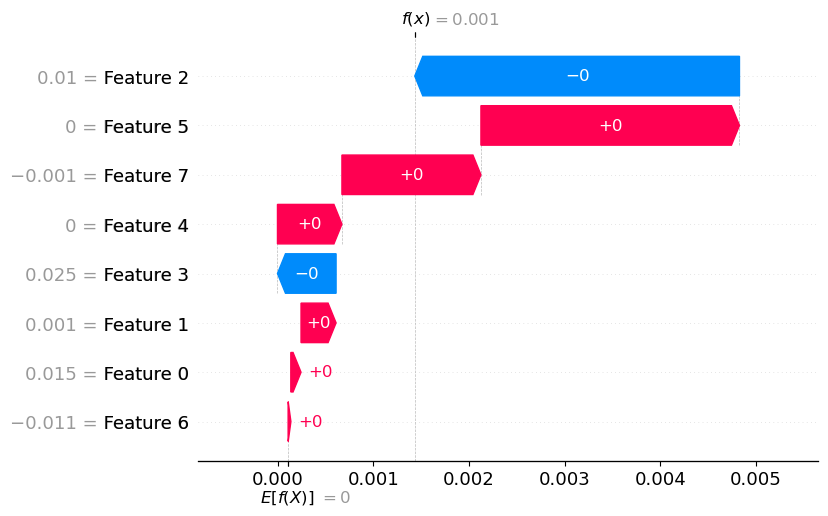

In [5]:
com = -1
# model = RandomForestRegressor(max_depth=2).fit(X_pre[:, hie[com]], y_pre.ravel())
# model = xgboost.XGBRegressor(max_depth=2).fit(X_pre[:, hie[com]], y_pre.ravel())
model = CatBoostRegressor(depth=2).fit(X_pre[:, hie[com]], y_pre.ravel())
# model = LGBMRegressor(depth=2).fit(X_pre[:, hie[com]], y_pre.ravel())
explainer = shap.Explainer(model)
shap_values = explainer(X_pre[:, hie[com]])
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

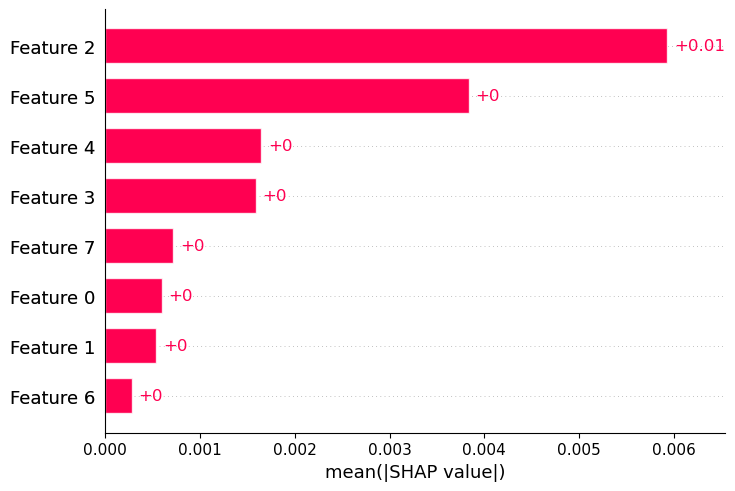

In [6]:
shap.plots.bar(shap_values)

In [7]:
fi = np.mean(np.abs(shap_values.values), axis=0)
fi, np.argsort(fi)[::-1]

(array([0.00059501, 0.00053979, 0.00593074, 0.00159235, 0.00164596,
        0.00383287, 0.00028233, 0.00072087]),
 array([2, 5, 4, 3, 7, 0, 1, 6]))

In [8]:
from shap_selection import feature_selection
feature_order = feature_selection.shap_select(model, X_pre, X_pre, 
                                              np.array(encoded_feature_names), 
                                              task='regression',
                                              agnostic=False)
feature_order

(array(['u_1', 'u*u*u_1', 'u*u_1', 'u_11', 'u*u*u_11', 'u', 'u*u',
        'u*u_11'], dtype='<U8'),
 array([59.30742464, 38.32870272, 16.45955007, 15.92352569,  7.20873014,
         5.9501125 ,  5.39792531,  2.82329283]))